In [1]:
! pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 58.2 MB/s eta 0:00:00


In [2]:
! pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=173e63c6b1e46629d80f1e5ed05783f8b748bd6d1502b26828aa5b63b9cd47b4
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [3]:
import numpy as np
import pandas as pd
import os
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch_geometric
from torch.nn import Parameter
from torch_geometric.utils.convert import to_networkx
import networkx as nx
import urllib.request
import tarfile
from torch_geometric.nn import GraphSAGE
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
from torch_geometric.loader import NeighborLoader
from torch_geometric.utils import to_networkx
from dataset import HW3Dataset

In [ ]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
import wandb
wandb.login()

wandb: Currently logged in as: omerie (whisper_team). Use `wandb login --relogin` to force relogin


True

In [4]:
dataset = HW3Dataset(root='data/hw3/')

Processing...
Done!


In [5]:
data = dataset[0]

In [6]:
data

Data(x=[100000, 128], edge_index=[2, 444288], y=[100000, 1], node_year=[100000, 1], train_mask=[80000], val_mask=[20000])

In [7]:
preds = pd.read_csv('predictions.csv')

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
y_true = np.array([y[0].item() for y in data.y])
y_pred = preds['prediction']

In [25]:
y_true_val = np.array([y[0].item() for y in data.y[80000:]])
y_pred_val = np.array(preds['prediction'].iloc[80000:])

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_true_val, y_pred_val)
print("Accuracy:", accuracy)

# Generate classification report
class_names = np.arange(40)  # Assuming you have 40 classes
report = classification_report(y_true_val, y_pred_val)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_true_val, y_pred_val)
print("Confusion Matrix:\n", cm)

Accuracy: 0.61495
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.21      0.26        89
           1       0.41      0.20      0.27        80
           2       0.60      0.63      0.62       618
           3       0.34      0.20      0.26       250
           4       0.59      0.56      0.57       673
           5       0.47      0.48      0.48       567
           6       0.38      0.20      0.27       191
           7       0.45      0.22      0.29        79
           8       0.58      0.51      0.54       768
           9       0.53      0.44      0.48       328
          10       0.42      0.47      0.45      1058
          11       0.27      0.08      0.12        89
          12       0.00      0.00      0.00         5
          13       0.29      0.34      0.31       264
          14       0.58      0.70      0.63        54
          15       0.47      0.48      0.48        54
          16       0.76      0.81      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_names = np.arange(40)  # Assuming you have 40 classes
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7009
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.26      0.33       459
           1       0.56      0.22      0.32       417
           2       0.67      0.72      0.70      3765
           3       0.40      0.26      0.32      1154
           4       0.72      0.68      0.70      3212
           5       0.62      0.63      0.63      3154
           6       0.49      0.27      0.35       795
           7       0.52      0.21      0.30       406
           8       0.67      0.58      0.62      4341
           9       0.67      0.55      0.60      2314
          10       0.59      0.61      0.60      5594
          11       0.45      0.11      0.18       436
          12       0.00      0.00      0.00        23
          13       0.49      0.47      0.48      1416
          14       0.74      0.73      0.74       486
          15       0.54      0.44      0.49       277
          16       0.80      0.87      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from torch_geometric.utils import degree

In [ ]:
max_degree = degree(data.edge_index[1]).max().item()
print("Maximal degree:", max_degree)

Maximal degree: 3804.0


In [ ]:
print(data)


Data(x=[100000, 128], edge_index=[2, 444288], y=[100000, 1], node_year=[100000, 1], train_mask=[80000], val_mask=[20000])


In [ ]:
# view the dataset details
# Print information about the dataset
print(f'Dataset: {dataset}')
print('-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Training nodes: {len(data.train_mask)}')
print(f'Evaluation nodes: {len(data.val_mask)}')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has self-loops: {data.has_self_loops()}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')


Dataset: HW3Dataset()
-------------------
Number of graphs: 1
Number of nodes: 100000
Number of edges: 444288
Number of features: 128
Number of classes: 40

Graph:
------
Training nodes: 80000
Evaluation nodes: 20000
Edges are directed: True
Graph has isolated nodes: True
Graph has self-loops: False
Average node degree: 4.44


In [ ]:
batch_size = 32

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader = NeighborLoader(
    data,
    num_neighbors=[20,50],
    batch_size=batch_size,
    input_nodes=data.train_mask,
    shuffle=True
)

In [ ]:
val_loader = NeighborLoader(
    data,
    num_neighbors=[20,50],
    batch_size=batch_size,
    input_nodes=data.val_mask,
    shuffle=True
)

In [ ]:
batch = next(iter(train_loader))

In [ ]:
batch

Data(x=[197, 128], edge_index=[2, 211], y=[197, 1], node_year=[197, 1], train_mask=[80000], val_mask=[20000], n_id=[197], e_id=[211], num_sampled_nodes=[3], num_sampled_edges=[2], input_id=[32], batch_size=32)

In [ ]:
batch.n_id[:5]

(tensor([0, 1, 2, 3, 4]), tensor([0, 1, 2, 3, 4]))

In [ ]:
def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

In [ ]:
def val_accuracy(pred_y, y):
    """Calculate val accuracy."""
    return ((pred_y == y).sum()).item()

In [ ]:
def get_train_mask(batch):
  idxs = batch.n_id
  train_mask = []
  for i,org_id in enumerate(idxs):
    if org_id<80000:
      train_mask.append(i)
  return train_mask

In [ ]:
def get_val_mask(batch):
  idxs = batch.n_id
  input_idxs = batch.input_id
  val_mask = []
  for i,org_id in enumerate(idxs):
    if org_id-80000 in input_idxs:
      val_mask.append(i)
  return val_mask

In [ ]:
val_batch = next(iter(val_loader))

In [ ]:
val_batch

Data(x=[350, 128], edge_index=[2, 398], y=[350, 1], node_year=[350, 1], train_mask=[80000], val_mask=[20000], n_id=[350], e_id=[398], num_sampled_nodes=[3], num_sampled_edges=[2], input_id=[32], batch_size=32)

In [ ]:
val_batch.input_id

tensor([19344,   532, 11671, 19179,  6290, 10520,  5556,  3463,  9579, 10981,
         3831, 14543, 18636,  6964, 12482,  5217,  1734,  4767,  7591,  5382,
         9006,  1032, 12626, 12611, 11949,  3314, 17658, 18202, 10924, 17175,
         4752, 19230])

In [ ]:
hist = np.zeros(40)
for y in data.y:
  hist[y[0].item()]+=1

In [ ]:
for idx, count in enumerate(hist):
  print(f'for class {idx}: {count}')

for class 0: 459.0
for class 1: 417.0
for class 2: 3765.0
for class 3: 1154.0
for class 4: 3212.0
for class 5: 3154.0
for class 6: 795.0
for class 7: 406.0
for class 8: 4341.0
for class 9: 2314.0
for class 10: 5594.0
for class 11: 436.0
for class 12: 23.0
for class 13: 1416.0
for class 14: 486.0
for class 15: 277.0
for class 16: 12112.0
for class 17: 229.0
for class 18: 443.0
for class 19: 2059.0
for class 20: 1578.0
for class 21: 316.0
for class 22: 1332.0
for class 23: 1679.0
for class 24: 8338.0
for class 25: 556.0
for class 26: 3068.0
for class 27: 1956.0
for class 28: 16991.0
for class 29: 256.0
for class 30: 5156.0
for class 31: 1547.0
for class 32: 286.0
for class 33: 960.0
for class 34: 5740.0
for class 35: 79.0
for class 36: 2625.0
for class 37: 1684.0
for class 38: 1158.0
for class 39: 1603.0


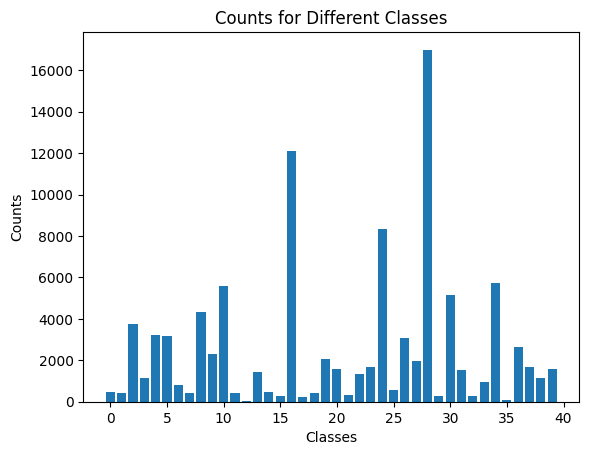

In [ ]:
 # Create a bar plot
plt.bar(np.arange(40), hist)

# Set labels and title
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Counts for Different Classes')

# Display the plot
plt.show()

In [ ]:
batch1 = next(iter(train_loader))
batch2 = next(iter(train_loader))

In [ ]:
batch1

Data(x=[478, 128], edge_index=[2, 543], y=[478, 1], node_year=[478, 1], train_mask=[80000], val_mask=[20000], n_id=[478], e_id=[543], num_sampled_nodes=[3], num_sampled_edges=[2], input_id=[32], batch_size=32)

In [ ]:
for idx,row in enumerate(batch1.edge_index):
  for it in row:
    if it.item() == 28:
      print(f'row {idx} ')

row 1 
row 1 
row 1 


In [ ]:
batch1, batch2

(Data(x=[225, 128], edge_index=[2, 223], y=[225, 1], node_year=[225, 1], train_mask=[80000], val_mask=[20000], n_id=[225], e_id=[223], num_sampled_nodes=[3], num_sampled_edges=[2], input_id=[32], batch_size=32),
 Data(x=[219, 128], edge_index=[2, 211], y=[219, 1], node_year=[219, 1], train_mask=[80000], val_mask=[20000], n_id=[219], e_id=[211], num_sampled_nodes=[3], num_sampled_edges=[2], input_id=[32], batch_size=32))

In [ ]:
def try_overfit(model, data, epochs):
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = model.optimizer
  batch1 = next(iter(train_loader))
  batch2 = next(iter(train_loader))
  batches = [batch1]
  for epoch in range(epochs+1):
    total_loss = 0
    acc = 0
    val_loss = 0
    val_acc = 0
    for batch in batches:
      train_mask, val_mask = get_masks(batch)
      optimizer.zero_grad()
      labels = data.y.flatten()
      labels_onehot = F.one_hot(labels, num_classes=40).float()
      out, out_softmax = model(batch.x, batch.edge_index)
      loss = criterion(out_softmax[train_mask], labels_onehot[train_mask])
      total_loss += loss
      acc += accuracy(out[train_mask].argmax(dim=1),
                      labels[train_mask])
      loss.backward()
      optimizer.step()
    print('-------------------------------')
    print(f'Epoch {epoch} | Train Loss: {total_loss/len(batches):.3f} '
          f'| Train Acc: {acc/len(batches)*100:>6.2f}% | Val Loss: '
          f'{val_loss/len(batches):.2f} | Val Acc: '
          f'{val_acc/len(batches)*100:.2f}%')

In [ ]:
def train_gat(model, data, epochs):
    data = data.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-4)
    train_loader_length = len(train_loader)
    model.train()
    train_losses = []
    val_losses = []
    train_accs = []
    test_accs = []
    for epoch in range(epochs+1):
      total_loss = 0
      acc = 0
      val_loss = 0
      val_acc = 0

      # Train on batches
      for batch_idx, batch in enumerate(train_loader):
        train_mask,val_mask = get_masks(batch)
        labels = batch.y.flatten()
        labels_onehot = F.one_hot(labels, num_classes=40).float()
        out = model(batch.x, batch.edge_index, batch.node_year)
        # print(batch.train_mask, )
        # print(out[train_mask], out[train_mask].shape)
        # print(labels_onehot[train_mask], labels_onehot[train_mask].shape)
        # print(labels[train_mask])
        # print(out[train_mask])
        loss = criterion(out[train_mask], labels[train_mask])
        total_loss += loss
        acc += accuracy(out[train_mask].argmax(dim=1),
                        labels[train_mask])
        # if batch_idx % 900 == 0:
        #   print('predictions and gt',out[train_mask].argmax(dim=1),
        #                 labels[train_mask])
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Validation
        if val_mask:
          val_loss += criterion(out[val_mask], labels_onehot[val_mask])
          val_acc += accuracy(out[val_mask].argmax(dim=1),
                              labels[val_mask])
        else:
          print('no val')

        # print(f'for batch {batch_idx}|{train_loader_length} acc is: {val_acc}')
      # Print metrics every 10 epochs
      print('-------------------------------')
      print(f'Epoch {epoch} | Train Loss: {total_loss/train_loader_length:.3f} '
            f'| Train Acc: {acc/train_loader_length*100:>6.2f}% | Val Loss: '
            f'{val_loss/train_loader_length:.2f} | Val Acc: '
            f'{val_acc/len(data.val_mask)*100:.2f}%')

In [ ]:
def train_gcn(model, data, epochs, lr=0.001):
    data = data.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
    train_loader_length = len(train_loader)
    model.train()
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    best_val_acc = 0.0
    for epoch in range(epochs+1):
      total_loss = 0
      acc = 0
      val_loss = 0
      val_acc = 0

      # Train on batches
      for batch_idx, batch in enumerate(train_loader):
        # train_mask = get_train_mask(batch)
        train_mask = [x for x in range(batch.batch_size)]
        labels = batch.y.flatten()
        labels_onehot = F.one_hot(labels, num_classes=40).float()
        out = model(batch.x, batch.edge_index)
        # print(batch.train_mask, )
        # print(out[train_mask], out[train_mask].shape)
        # print(labels_onehot[train_mask], labels_onehot[train_mask].shape)
        # print(labels[train_mask])
        # print(out[train_mask])
        loss = criterion(out[train_mask], labels[train_mask])
        total_loss += loss
        acc += accuracy(out[train_mask].argmax(dim=1),
                        labels[train_mask])
        # if batch_idx % 900 == 0:
        #   print('predictions and gt',out[train_mask].argmax(dim=1),
        #                 labels[train_mask])
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # # Validation
        # if val_mask:
        #   val_loss += criterion(out[val_mask], labels_onehot[val_mask])
        #   val_acc += val_accuracy(out[val_mask].argmax(dim=1),
        #                       labels[val_mask])

        # print(f'for batch {batch_idx}|{train_loader_length} acc is: {val_acc}')
      # Get validation metrics
      model.eval()
      with torch.no_grad():
        for batch_idx, batch in enumerate(val_loader):
          # val_mask = get_val_mask(batch)
          val_mask = [x for x in range(batch.batch_size)]
          labels = batch.y.flatten()
          labels_onehot = F.one_hot(labels, num_classes=40).float()
          out = model(batch.x, batch.edge_index)
          val_loss += criterion(out[val_mask], labels[val_mask])
          val_acc += val_accuracy(out[val_mask].argmax(dim=1),
                          labels[val_mask])
      model.train() # set the model back to training mode
      wandb.log({
            "train_acc": acc/train_loader_length*100,
            "val_acc": val_acc/len(data.val_mask)*100,
            "train_loss": total_loss/train_loader_length,
            "val_loss":  val_loss/len(val_loader)})
      print('-------------------------------')
      print(f'Epoch {epoch} | Train Loss: {total_loss/train_loader_length:.3f} '
            f'| Train Acc: {acc/train_loader_length*100:>6.2f}% | Val Loss: '
            f'{val_loss/len(val_loader):.2f} | Val Acc: '
            f'{val_acc/len(data.val_mask)*100:.2f}%')
      train_losses.append(total_loss/train_loader_length)
      train_accs.append(acc/train_loader_length*100)
      val_accs.append(val_acc/len(data.val_mask)*100)
      val_losses.append(val_loss/len(val_loader))
      # Check if the current model has the best validation accuracy
      if val_acc > best_val_acc:
          best_val_acc = val_acc
          # Save the current best model
          torch.save(model.state_dict(), 'best_model.pth')
    wandb.finish()
    return train_accs,train_losses,val_accs,val_losses


In [ ]:
def train_try(model, data_loader, device):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    criterion = torch.nn.CrossEntropyLoss()
    model.train()
    total_loss = 0.0

    for batch in data_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        train_mask,val_mask = get_masks(batch)
        output = model(batch.x, batch.edge_index)
        # print(output[data.train_mask], output.shape)
        print(data.y[train_mask])
        print(output[train_mask])
        loss = criterion(output[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs

    return total_loss / len(data_loader.dataset)

In [ ]:
# class GCN(torch.nn.Module):
#     def __init__(self):
#         super(GCN, self).__init__()
#         self.conv1 = GCNConv(dataset.num_node_features, 128, improved=True)
#         self.conv2 = GCNConv(128,64, improved=True)
#         self.conv3 = GCNConv(64, dataset.num_classes)
#     def forward(self, x, edge_index):
#         # x: Node feature matrix
#         # edge_index: Graph connectivity matrix
#         #x, edge_index = data.x, data.edge_index
#         x = self.conv1(x, edge_index)
#         x = F.relu(x)
#         x = self.conv2(x, edge_index)
#         # x = F.dropout(x, training=self.training)
#         x = F.relu(x)
#         x = self.conv3(x, edge_index)
#         return x

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 256, improved=True)
        self.conv2 = GCNConv(256,128, improved=True)
        self.conv3 = GCNConv(128,64, improved=True)
        self.conv4 = GCNConv(64, dataset.num_classes, improved=True)
    def forward(self, x, edge_index):
        # x: Node feature matrix
        # edge_index: Graph connectivity matrix
        #x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        # x = F.dropout(x, training=self.training)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = self.conv4(x, edge_index)
        return x

In [ ]:
wandb.init(
      # Set the project where this run will be logged
      project="lab3",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"GCN_02_4layers_train_only_input_improved_all",
      save_code=True,
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.001,
      "architecture": "GCN",
      "epochs": 50,
      })

In [ ]:
# Create GCN
gcn = GCN().to(device)
print(gcn)

GCN(
  (conv1): GCNConv(128, 256)
  (conv2): GCNConv(256, 128)
  (conv3): GCNConv(128, 64)
  (conv4): GCNConv(64, 40)
)


In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [ ]:
train_try(gcn,train_loader,device)

In [ ]:
try_overfit(gcn, data, 200)

In [ ]:
# Train GCN
train_accs,train_losses,val_accs,val_losses = train_gcn(gcn, data, 100, 0.001)

-------------------------------
Epoch 0 | Train Loss: 1.789 | Train Acc:  50.49% | Val Loss: 1.70 | Val Acc: 52.58%
-------------------------------
Epoch 1 | Train Loss: 1.575 | Train Acc:  55.41% | Val Loss: 1.59 | Val Acc: 55.35%
-------------------------------
Epoch 2 | Train Loss: 1.521 | Train Acc:  56.71% | Val Loss: 1.58 | Val Acc: 54.84%
-------------------------------
Epoch 3 | Train Loss: 1.489 | Train Acc:  57.41% | Val Loss: 1.54 | Val Acc: 56.55%
-------------------------------
Epoch 4 | Train Loss: 1.461 | Train Acc:  58.13% | Val Loss: 1.55 | Val Acc: 55.51%
-------------------------------
Epoch 5 | Train Loss: 1.442 | Train Acc:  58.65% | Val Loss: 1.52 | Val Acc: 56.84%
-------------------------------
Epoch 6 | Train Loss: 1.423 | Train Acc:  59.24% | Val Loss: 1.54 | Val Acc: 56.03%
-------------------------------
Epoch 7 | Train Loss: 1.406 | Train Acc:  59.55% | Val Loss: 1.47 | Val Acc: 58.18%
-------------------------------
Epoch 8 | Train Loss: 1.391 | Train Acc:

best run: lr=0.001, train_loader: [Neigbors=[20,50],batch_size=32] <br>
 GCN(
  (conv1): GCNConv(128, 128)
  (conv2): GCNConv(128, 64)
  (conv3): GCNConv(64, 40)
)
best_acc 64.24%

Second best run: lr=0.0005, train_loader: [10,30],bs=32] <br>
best_acc=63.81%

In [ ]:
wandb.finish()

train_acc,▁▂▂▃▃▄▅▅▅▆▅▅▆▇▆▇▇▇▇▇▇▇▇▇▇▇██▇▇██████████
train_loss,█▇▆▅▅▄▄▄▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▄▄▃▃▆▅▄▆▄▆▂▄▅▄▄▆▆▄▆▁▅▄▅▇▅▆▅▅▄▅▆▅▆▇▇▅▅██▆
val_loss,▅▆▆▇▃▃▄▃▅▃▅▄▃▄▅▃▃▄▂█▄▃▃▁▃▂▄▂▆▃▃▃▃▂▂▃▄▁▁▁
train_acc,60.1475
train_loss,1.37335
val_acc,57.225
val_loss,1.48696


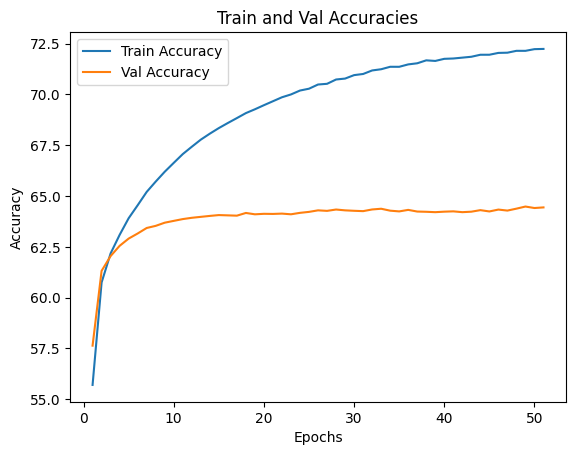

In [ ]:
epochs = range(1, len(train_accs) + 1)

plt.plot(epochs, train_accs, label='Train Accuracy')
plt.plot(epochs, val_accs, label='Val Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracies')
plt.legend()

plt.show()

In [ ]:
train_accs,train_losses,val_accs,val_losses

In [ ]:


# Test GCN
print(f'\nGCN test accuracy: {test(gat, data)*100:.2f}%\n')

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 128
        self.in_head = 16
        self.out_head = 1

        self.conv1 = GATConv(dataset.num_features, self.hid, heads=self.in_head, dropout=0.2)
        self.conv2 = GATConv(self.hid*self.in_head, dataset.num_classes, concat=False,
                             heads=self.out_head, dropout=0.2)
        self.fc1 = torch.nn.Linear(1024,256)
        self.fc2 = torch.nn.Linear(256,40)

    def forward(self,x, edge_index):

        # Dropout before the GAT layer is used to avoid overfitting
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        # x = self.conv2(x, edge_index)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
# Create GAT
gat = GAT().to(device)
print(gat)



GAT(
  (conv1): GATConv(129, 128, heads=16)
  (conv2): GATConv(2048, 40, heads=1)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=40, bias=True)
)


In [ ]:
# Train Graph Attention Network
train_accs,train_losses,val_accs,val_losses = train_gcn(gat, data, 50, 0.001)

TypeError: ignored

In [ ]:
try_overfit(gat,data,200)

In [ ]:
# def train_no_batches(model, data, epochs):
#     criterion = torch.nn.CrossEntropyLoss()
#     optimizer = model.optimizer

#     model.train()
#     for epoch in range(epochs+1):
#         total_loss = 0
#         acc = 0
#         val_loss = 0
#         val_acc = 0

#         optimizer.zero_grad()
#          # Convert labels to one-hot vectors
#         labels_onehot = F.one_hot(data.y.flatten(), num_classes=40).float()

#         # Forward pass
#         _, out = model(data.x, data.edge_index)
#         # print(out.shape, out[0])

#         loss = criterion(out[data.train_mask], labels_onehot[data.train_mask])
#         total_loss += loss.item()
#         acc += accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])

#         # Backward pass
#         loss.backward()
#         optimizer.step()

#         # Validation
#         with torch.no_grad():
#             _, val_out = model(data.x, data.edge_index)
#             val_loss += criterion(val_out[data.val_mask], data.y[data.val_mask])
#             val_acc += accuracy(val_out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

#         # Print metrics every 10 epochs
#         if epoch % 10 == 0:
#             print(f'Epoch {epoch:>3} | Train Loss: {total_loss:.3f} '
#                   f'| Train Acc: {acc * 100:.2f}% | Val Loss: {val_loss:.2f} '
#                   f'| Val Acc: {val_acc * 100:.2f}%')


####TODO: try to load with all neighbors. in predict.py load and predict only for the input nodes, not for the neighbors.